In [43]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from fbprophet import Prophet
from datetime import datetime
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [9]:
def create_dataframe_from_file(filename):
    with open(filename, "r") as file:
        values = json.load(file)[0]['values']
        df = pd.DataFrame(values, columns=["ds", "y"]).apply(pd.to_numeric, errors="raise")
        df.ds = pd.to_datetime(df["ds"], unit="s")
        return df

def plot_dataframe(df, legend):
    plt.figure(figsize=(20,10))
    plt.plot(df.ds, df.y)
    plt.legend([legend])
    plt.show()    

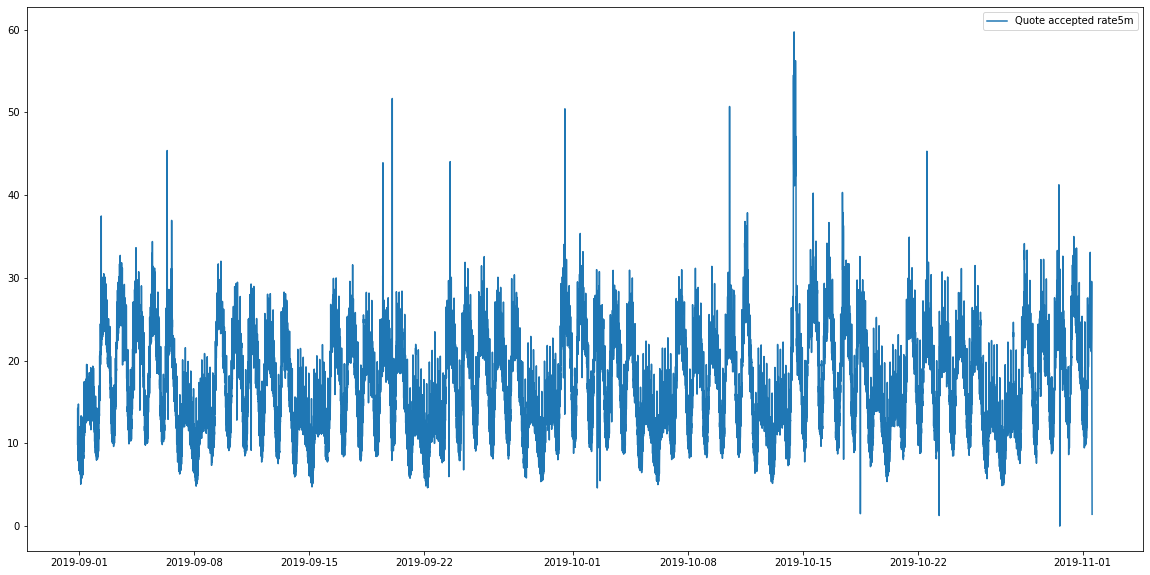

In [11]:
# NOTE: 1 crazy outlier (value 6000) has been removed from the data set
quote_df = create_dataframe_from_file("metrics/quote-accepted-total-v2-sum-rate5m.json")
plot_dataframe(quote_df, "Quote accepted rate5m")

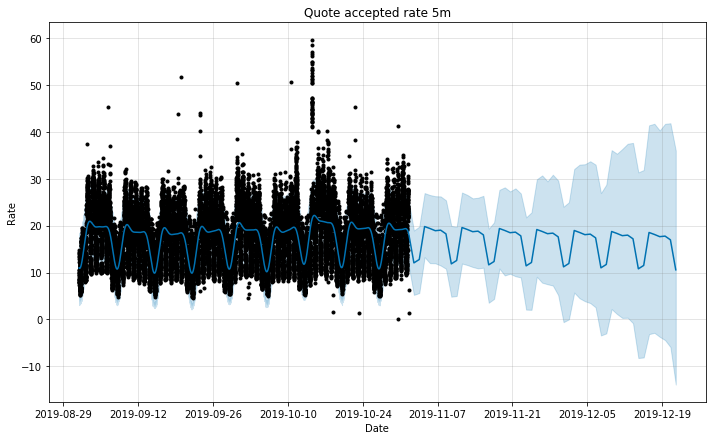

In [17]:
quote_model = Prophet(daily_seasonality=False, yearly_seasonality=False)
quote_model = quote_model.fit(quote_df)
quote_build_forecast = quote_model.make_future_dataframe(periods=50, freq='D')
quote_forecast = quote_model.predict(quote_build_forecast)

# plot forecasts
quote_model.plot(quote_forecast, xlabel='Date', ylabel='Rate')
plt.title('Quote accepted rate 5m')
# display graph
plt.show()

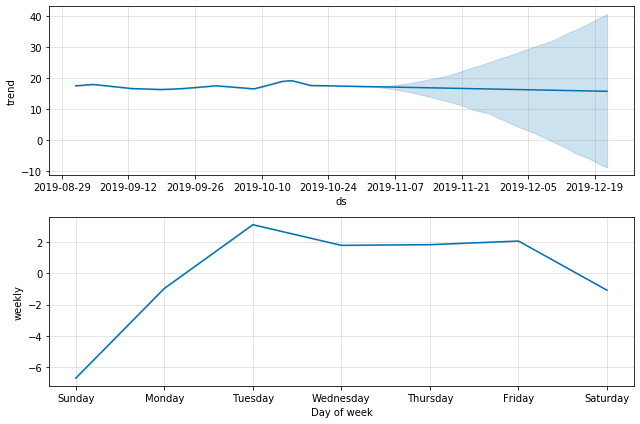

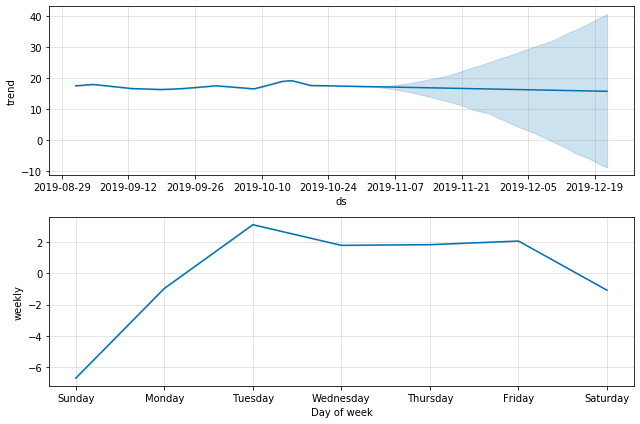

In [23]:
quote_model.plot_components(quote_forecast)

In [47]:
quote_model_cv = cross_validation(quote_model, initial='40 days', period='7 days', horizon='20 days')
quote_model_perf_metrics=performance_metrics(quote_model_cv)

print(quote_model_perf_metrics.tail(3))

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-10-12 13:55:00 and 2019-10-12 13:55:00


              horizon        mse      rmse       mae      mape  coverage
5181 19 days 23:40:00  34.521234  5.875477  4.949444  6.205990  0.826087
5182 19 days 23:55:00  34.836828  5.902273  4.967998  6.209567  0.824348
5183 20 days 00:00:00  35.422309  5.951664  4.994174  6.232062  0.822609


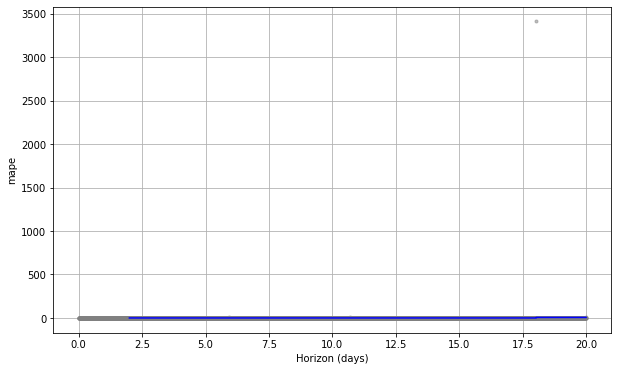

In [44]:
# visualize mape across horizon 
fig = plot_cross_validation_metric(quote_model_cv, metric='mape')

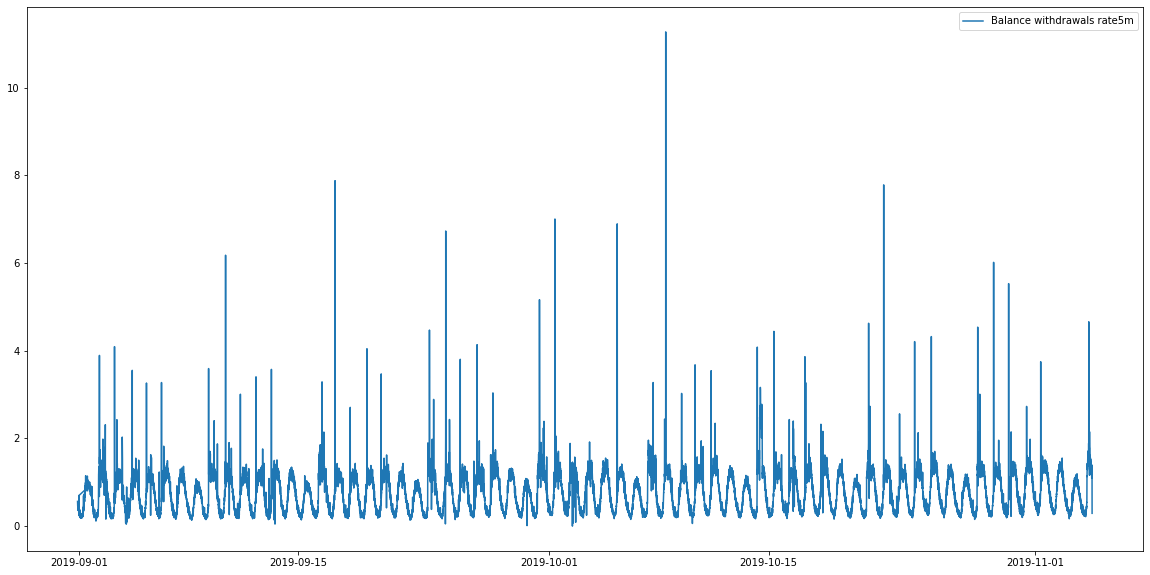

In [22]:
# plot
balance_df = create_dataframe_from_file("metrics/balance_withdrawals_historical_sum_rate_5m.json")
plot_dataframe(balance_df, "Balance withdrawals rate5m")

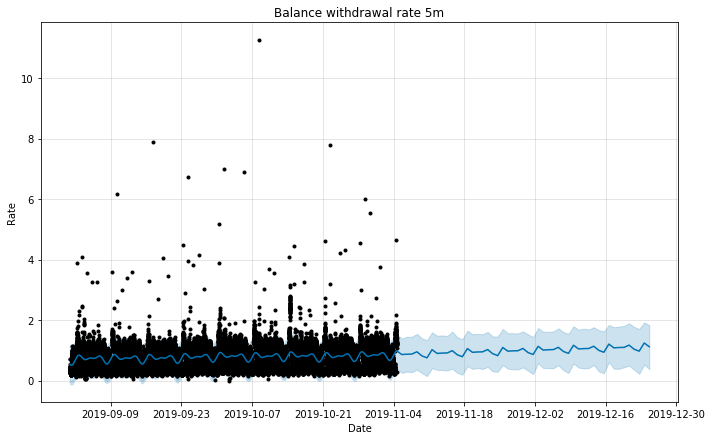

In [27]:
balance_model = Prophet(daily_seasonality=False, yearly_seasonality=False)
balance_model = balance_model.fit(balance_df)
balance_build_forecast = balance_model.make_future_dataframe(periods=50, freq='D')
balance_forecast = balance_model.predict(balance_build_forecast)

# plot forecasts
balance_model.plot(balance_forecast, xlabel='Date', ylabel='Rate')
plt.title('Balance withdrawal rate 5m')
# display graph
plt.show()

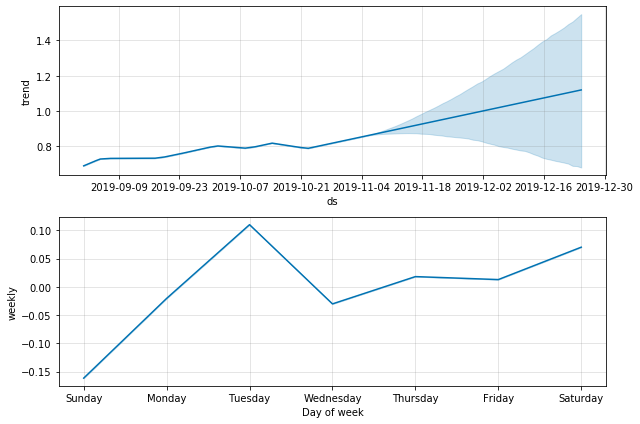

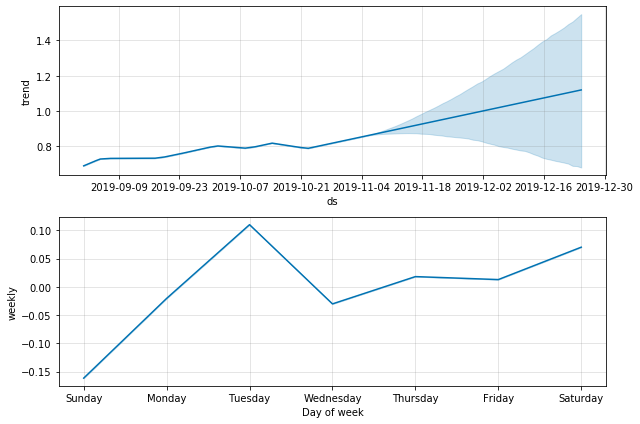

In [28]:
balance_model.plot_components(balance_forecast)